Interpretation of content from *Baysean Statistics the Fun Way* by Will Kurt
## Chapter 4: Binomial Probability Distribution

In [1]:
import math
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

**Combinatorics** - Binomial Probability  
"n choose k," out of n trials, get k successes:  

$ \left( \begin{array}{c} n \\ k \end{array} \right) = \large\frac{n!}{k!  (n-k)!} $

To do this we can use `math.comb(n, k)`, reveals the number of ways it can happen:

In [2]:
# Out of 5 trials, get 2 successes:
n = 5
k = 2
num_ways = math.comb(n, k)
print(f'There are {num_ways} ways to get 2 successes out of 10 trials')

There are 10 ways to get 2 successes out of 10 trials


Using this formula, we can combine it with the probabilities of the different outcomes, and plot the probabilities of *all outcomes* in a probability mass function:  
  
Probability of getting k successes (where p is prob success and q = 1-p (prob failure):
$$ P(k) = pmf = \large\frac{n!}{k!  (n-k)!} * p^x * q^{(n-x)} $$  
  
In Python, we can do this with `binom.pmf(k,n,p)`  
Visualize the binomial distribution for 10 coin flips

In [3]:
n = 10 # 10 trials
p = .5 # .5 chance of success
k = list(range(0,11)) # a listing of all possible outcomes, i.e. number of successes,
#  from 0 heads to 10 heads. 

In [4]:
# pmf probability mass function
probs = list(binom.pmf(k,n,p))  

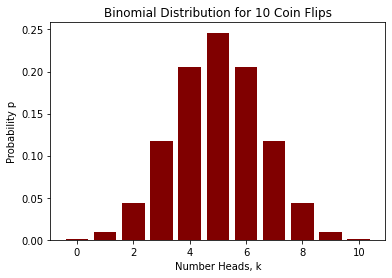

In [5]:
# figure 4-1
plt.bar(k, probs, color = 'maroon')
plt.title("Binomial Distribution for 10 Coin Flips")
plt.xlabel("Number Heads, k")
plt.ylabel("Probability p")
plt.show()

Visualize the binomial distribution for 10 rolls of a 6 sided die

In [6]:
n = 10
p = 1/6
k = list(range(0,11))

In [7]:
probs = binom.pmf(k,n,p)

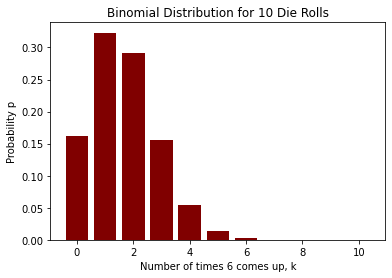

In [8]:
# figure 4-2
plt.bar(k, probs, color = 'maroon')
plt.title("Binomial Distribution for 10 Die Rolls")
plt.xlabel("Number of times 6 comes up, k")
plt.ylabel("Probability p")
plt.show()

We can get a cumulative probability to reflect the probability of a range k and up, or down with  
`binom.cdf(k,n,p)`

In [9]:
n = 10  # trials
p = 0.5  # probability of success in each trial

# Choose a specific point for which you want to calculate the cumulative probability
k = 8  # number of successes

# Calculate the cumulative probability using the cdf method
cumulative_probability = binom.cdf(k, n, p)

# up to k (left side)
print(f"Cumulative Probability for {k} or fewer successes: {cumulative_probability:.4f}")
# more than k, (right side)
print(f"Cumulative Probability for {k+1} or more successes: {1-cumulative_probability:.4f}")


Cumulative Probability for 8 or fewer successes: 0.9893
Cumulative Probability for 9 or more successes: 0.0107


### Chapter 4 Exercises
#### 1. What are the params of the binom dist for the probability of rolling either a 1 or a 20 on a 20 sided die, if we roll the die 12 times?
B(k; n, p) = B(1; 12, 1/10)

In [10]:
k, b, p = 1, 12, 1/10
print(f'{round(binom.pmf(k,n,p), 2)*100}%')

39.0%


#### 2. Standard 52 card deck. Shuffle, draw and replace. How many ways can you pull just one ace in five pulls?  

In [11]:
# obviously 5, but in case the numbers were messiers, here it is:
n = 5 # 5 pulls
k = 1 # just one ace
math.comb(n, k) 

5

#### 3. Continuing with the cards, what's the prob of pulling 5 aces in 10 pulls?
This is a binomial probability question.  
We've got 10 trials (n=10), looking for 5 successes (k=5), and the odds of a success on a single trial, considering we have replacement, is 4/52.

In [12]:
k = 5
n = 10
p = 4/52
print(f' probability is {round(binom.pmf(k,n,p)*100, 3)}%')

 probability is 0.045%


#### 4. If you have a 1/5 probability of a job offer when you interview, and you interview at 7 companies a month, what's the probability you'll have at least 2 competing offers by the end of the month?
Another binomial problem. 7 trials, probability of success 1/5, looking for 2 OR MORE successes.

In [13]:
# using pmf with a loop to get 2 and up.
sum = 0 
for i in range(2,8):
    sum += binom.pmf(i,7,1/5)
print(f'{round(100*sum,3)}%')

42.328%


In [14]:
# using cdf... I guess it works like "greater than k" as in the next number up, 
# so we use k=1? Too lazy to check this docs, but this is how you get the correct answer. 
k = 1
n = 7
p = 1/5
print(f' probability is {round((1-binom.cdf(k,n,p))*100, 3)}%')

 probability is 42.328%


#### 5. Continuing with the job example. You have 25 job interviews lined up next month. This will leave you exhausted and so the probability of success will drop to 1/10. You don't want to do 25 interviews unless doing so makes you twice as likely to get at least 2 offers. So should you do the 25, or just stick to the 7?

In [15]:
k = 1
n = 25
p = 1/10
print(f' probability is {round((1-binom.cdf(k,n,p))*100, 3)}%')

 probability is 72.879%


That's a lot higher, but it's not twice as likely, so maybe don't do all those interviews.

---

## Chapter 5: The Beta Distribution
  
"Used to estimate the probability of an event for which you've already observed a number of trials and successful outcomes."
Goal is to take in data and come up with *estimates* of probabilities. 

**Inference**: The task of figuring out probabilities based on data. 

#### Example: Magic box that takes quarters. Sometimes it eats the quarter, sometimes it returns 2 quarters.

Naive hypothesis is that we have a 50/50 chance to win or lose.     
Gather data: We put in 41 quarters and keep track of the results:

In [16]:
wins = 14
losses = 27

Updating our hypothesis:   
$H_1$ is P(two coins) = 1/2  
$H_2$ is P(two coins) = 14/41

"How probable is what we observed if $H_1$ were true vs $H_2$?"  
We can calculate this with binomial distribution!

In [25]:
# set up for binomial distribution:
k = wins
n = wins + losses
p_h1 = 1/2 # probability of hypothesis 1
p_h2 = 14/41 # probability of hypothesis 2

print(f'''The probability of observing 14 wins out of 41 attemps, given that the
odds of a win are 1/2 is {round(binom.pmf(k, n, p_h1), 3)}''')

The probability of observing 14 wins out of 41 attemps, given that the
odds of a win are 1/2 is 0.016


In [26]:
print(f'''The probability of observing 14 wins out of 41 attemps, given that the
odds of a win are 14/41 is {round(binom.pmf(k, n, p_h2), 3)}''')

The probability of observing 14 wins out of 41 attemps, given that the
odds of a win are 14/41 is 0.13


It looks much more probable our hypothesis based on the data observed from 41 attemps is closer to the truth than the assumption the probability of winning is 50/50-- 13% vs 1.6%.
  
There are any number of different hypotheses we can make. Here is the plot for success probabilities from 0.1 to 0.9, increments of .1:

In [45]:
p_range = np.arange(0.1, 1, 0.1)
probs = binom.pmf(k, n, p_range)

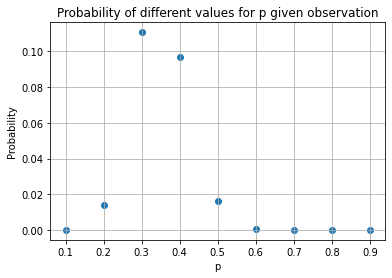

In [48]:
plt.scatter(p_range, probs)
plt.title("Probability of different values for p given observation")
plt.xlabel("p")
plt.ylabel("Probability")
plt.grid()

(figure 5-1)  
Here we have the probabilities of observing 14 wins and 27 losses given different hypotheses about the true probability of and individual success.  
Next, to flesh out the pattern by trying more hypotheses (foreshadowing the use of beta distribution/calculus):

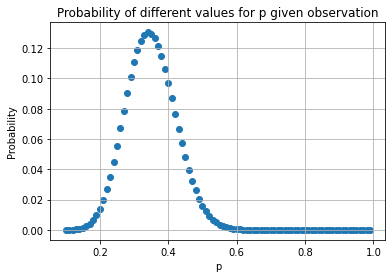

In [49]:
p_range = np.arange(0.1, 1, 0.01)
probs = binom.pmf(k, n, p_range)
plt.scatter(p_range, probs)
plt.title("Probability of different values for p given observation")
plt.xlabel("p")
plt.ylabel("Probability")
plt.grid()

(Figure 5-2)  
PDF). This is similar to a probability mass function, but used for continuous values:

$Beta(p; \alpha, \beta) = \large\frac{p^{\alpha-1}*(1-p)^{\beta-1}}{beta(\alpha, \beta)}$
Where:  
- p = probability of an event
- $\alpha$ = successes observed
- $\beta$ = fails observed

In python we an use `scipy.stats`: `beta.pdf(k,n,p_range)`

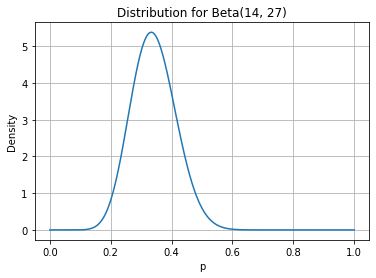

In [88]:
from scipy.stats import beta

# setup variables
alpha = 14 # successes
beta_val = 27 # fails
x_vals = np.linspace(0,1, 1000) # x-axis
# the usage of np.linspace makes for a visually smooth curve, but really
# what is represented are infinite points on the x-axis, not just 1000

# beta dist probability density function
pdf_vals = beta.pdf(x_vals, alpha, beta_val) 

# plot

plt.plot(x_vals, pdf_vals)
plt.title("Distribution for Beta(14, 27)")
plt.xlabel("p")
plt.ylabel("Density")
plt.grid()
plt.show()

Figure 5-3

This distribution can be used to quantify exactly how strongly we believe that "the probability that the true rate at which the box returns two quarters is less than 0.5. Just gotta integrate to find the relevant area under the curve. Easily done with Python:

In [73]:
auc = beta.cdf(0.5, alpha, beta_val)
print(f'The probability that the rate individual success is less than 0.5 is {auc}')

The probability that the rate individual success is less than 0.5 is 0.9807613458578999


#### Reverse-Engineering the Gacha Game

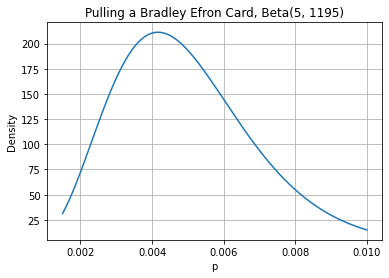

In [82]:
alpha = 5 # successes
beta_val = 1195 # failures

x_vals = np.linspace(0.0015,.01,1000)
pdf_vals = beta.pdf(x_vals, alpha+1, beta_val+1)
# adding 1 to these to avoid a div by zero error. 
# Look into additive, or "laplace smoothing."
# Introduces a weak prior assumption.

plt.plot(x_vals, pdf_vals)
plt.title("Pulling a Bradley Efron Card, Beta(5, 1195)")
plt.xlabel("p")
plt.ylabel("Density")
plt.grid()
plt.show()

(Figure 5-4)
Friend only want to play this game if there is a better than 0.7 probability that the chance of pulling an Efron card is greater than 0.005

In [84]:
auc = 1-beta.cdf(0.005, alpha, beta_val)
auc

0.28505593979614996

So, no. The probability that the chance of pulling an Efron Card being greater than 0.005 is only 0.285, far from the 0.7 threshold our friend is looking for. 

### Chapter 5 Exercises
(visualizations here are my own supplemental material, not recreations of visualizations in the book)

#### 1. You want to use the beta distribution to determine if you have a fair coin. You flip the coin 10 times, get 4 heads, 6 tails. What's the probability that the coin will land on heads >60% of the time?

In [106]:
# parameters
alpha = 4
beta_val = 6
thresh = 0.6

In [107]:
# probability
prob = round((1- beta.cdf(0.6, alpha, beta_val))*100,2)
print(f'There is a {prob}% chance the true probability of getting a heads is greater than 60%') 

There is a 9.94% chance the true probability of getting a heads is greater than 60%


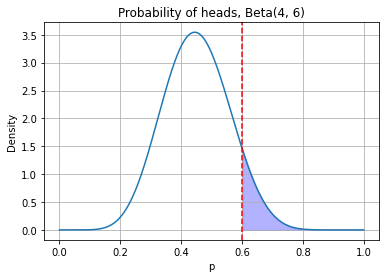

In [115]:
# visualization:
x_vals = np.linspace(0,1,1000)
pdf_vals = beta.pdf(x_vals, alpha, beta_val)
plt.plot(x_vals, pdf_vals)

plt.axvline(x=thresh, color='red', linestyle='--')
plt.fill_between(x_vals, pdf_vals, where=(x_vals >= thresh), 
                 color='blue', alpha=0.3)

plt.title("Probability of heads, Beta(4, 6)")
plt.xlabel("p")
plt.ylabel("Density")
plt.grid()
plt.show()

#### 2. You flip the coin 10 more times and now have 9 heads and 11 tails. What's the probability the coin is fair, give or take 5%?

In [140]:
# parameters
alpha, beta_val = 9, 11   
thresh_gt  = 0.45
thresh_lt = 0.55

In [141]:
def beta_viz(alpha, beta_val, thresh_gt, thresh_lt):
    '''
    alpha: observed successes
    beta_val: observed fails
    thresh_lt: probability upper bound
    thresh_gt: proability lower bound
    '''
    # probability
    prob_upper = beta.cdf(thresh_lt, alpha, beta_val)
    prob_lower = beta.cdf(thresh_gt, alpha, beta_val)

    range_prob = round((prob_upper-prob_lower)*100,2)
    
    print(f"There's a {range_prob}% chance the coin is fair, give or take 5%, " 
          "\nvisualized by the shaded area below:")
    
    # visualization
    x_vals = np.linspace(0,1,1000)
    pdf_vals = beta.pdf(x_vals, alpha, beta_val)
    plt.plot(x_vals, pdf_vals)

    plt.axvline(x=thresh_gt, color='red', linestyle='--')
    plt.axvline(x=thresh_lt, color='red', linestyle='--')
    plt.fill_between(x_vals, pdf_vals, where=((thresh_gt < x_vals) & 
                    (x_vals < thresh_lt)), color='blue', alpha=0.3)

    plt.title(f"Probability of a fair coin, -+5%, Beta({alpha}, {beta_val})")
    plt.xlabel("p")
    plt.ylabel("Density")
    plt.grid()
    return plt.show()

There's a 30.99% chance the coin is fair, give or take 5%, 
visualized by the shaded area below:


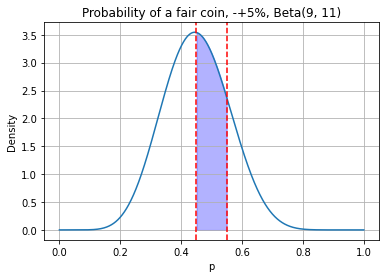

In [138]:
beta_viz(alpha, beta_val, thresh_gt, thresh_lt)

#### 3. You flip the coin 200 more times, and end up with 109 heads and 111 tails. Now what's the probability, give or take 5%?

There's a 85.89% chance the coin is fair, give or take 5%, 
visualized by the shaded area below:


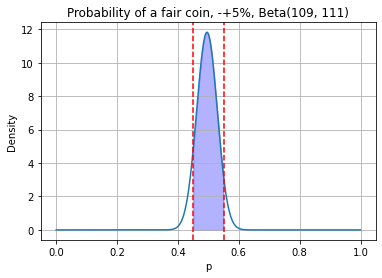

In [139]:
# parameters
alpha, beta_val = 109, 111   
thresh_gt  = 0.45
thresh_lt = 0.55

beta_viz(alpha, beta_val, thresh_gt, thresh_lt)

^Now that's looking more like the curve we'd expect to see with a fair coin.

---

## Chapters 6-8
No coding here, just pure Baysean theory goodness.

---

## Chapter 9: Baysean Priors and Working with Probability Distributions
The coding here is actually a natural continuation of what we saw just above in chapter 5, but now in a more Baysian context.
  
Example: Success at navigating an asteroid field. It's a pass or fail question we have some existing data for, so this can be modeled with a beta distribution.
We have previously observed 2 survive and 7,442 crashes.

In [31]:
from scipy.stats import beta

Get a distribution for our **likelihood**.

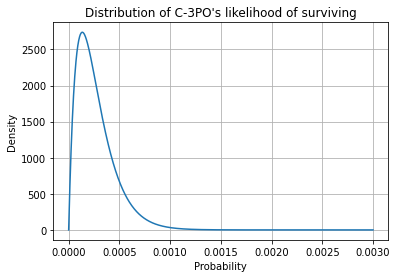

In [5]:
alpha, beta_val = 2, 7442
x_vals = np.linspace(0,0.003, 1000) # setup x-axis
pdf_vals = beta.pdf(x_vals, alpha, beta_val)
plt.plot(x_vals, pdf_vals)
plt.title("Distribution of C-3PO's likelihood of surviving")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.grid()
plt.show()

Figure 9-1

This distribution represents a range of likelihood probabilities:  
P(we observe a survival *given* we have seen 2/7440 pilots survived in the past.)

Now estimate our **prior** belief/hypothesis probability.  
We *believe* Han Solo is no ordinary pilot. Use the asssumption that Han will survivie is 20,000 to 1. Here's the distribution for that:

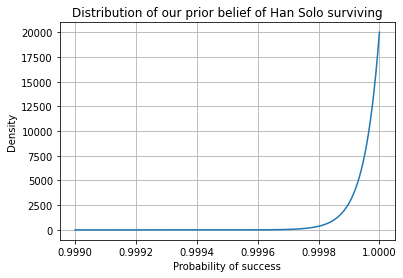

In [7]:
alpha, beta_val = 20000, 1
x_vals = np.linspace(.999,1, 1000) # setup x-axis
pdf_vals = beta.pdf(x_vals, alpha, beta_val)
plt.plot(x_vals, pdf_vals)
plt.title("Distribution of our prior belief of Han Solo surviving")
plt.xlabel("Probability of success")
plt.ylabel("Density")
plt.grid()
plt.show()

Figure 9-2

Ok, this next part is really cool and convenient. We don't have a normalizer, P(E), for this. That is, we don't know the survivability rate overall for all pilots. But we can combine the alpha and betas from the two distributions above to actually get a normalized posterior probability range:  
Beta(2+20000, 7440+1)

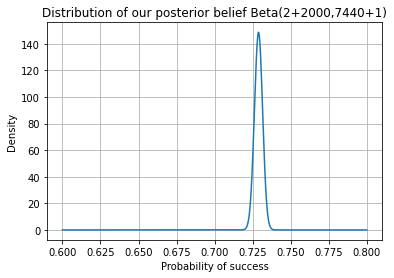

In [9]:
alpha, beta_val = 20002, 7441
x_vals = np.linspace(.6,.8, 1000) # setup x-axis
pdf_vals = beta.pdf(x_vals, alpha, beta_val)
plt.plot(x_vals, pdf_vals)
plt.title("Distribution of our posterior belief Beta(2+2000,7440+1)")
plt.xlabel("Probability of success")
plt.ylabel("Density")
plt.grid()
plt.show()

Figure 9-3

### Chapter 9 Exercises
#### 1. Coin flips, we observe 6 heads in a row and then 1 tails.  
- Give the beta distribution that describes this. 
- Use integration to determine the probability that the true rate of flipping heads is between 0.4 and 0.6


In [43]:
from scipy.stats import beta
from scipy.integrate import quad

alpha = 6 # heads
beta_val = 1 # tails
lower = 0.4 # lower bound we're interested in for probability
upper = 0.6 # upper bound

# lambda function gives us our curve
# scipy.integrate.quad method then integrates the specified range 
result, abs_error = \
    quad(lambda x: beta.pdf(x, alpha, beta_val), lower, upper)

print(f"Probability: {round(result, 5)}")
print(f"with absolute error < {abs_error}")

Probability: 0.04256
with absolute error < 4.725109192804664e-16


Based on the observed flips, we estimate that there is just over a 4% chance the coin is fair. 

#### 2. Come up with a prior that the coin *is* fair. Use a beta distribution such that there is at least a 95% chance that the tru rate of flipping heads is between 0.4 and 0.6.  

The beta function above can serve as a likelihood measure. We can introduce a prior assume the coin is fair (alpha=beta). We don't have a normalizer since we don't know the probability of all coins fair and not. But we can combine the alphas and betas. The higher the alpha of the prior is, the higher our probability will be for the given range 0.4 to 0.6

In [44]:
prior = 54
alpha, beta_val = 6+prior, 1+prior # update the alpha and beta

result, abs_error = \
    quad(lambda x: beta.pdf(x, alpha, beta_val), lower, upper)

print(f"Probability: {round(result, 5)}")
print(f"with absolute error < {abs_error}")

Probability: 0.95043
with absolute error < 1.1765344527092858e-11


An alpha and beta for the prior distribution of 54 lets us pass the 95% confidence mark. 

#### 3. Now see how many more heads (w/ no more tails) it would take to convince you there is a reasonable chance that the coin is not fair--Drop the confidence for the 0.4 to 0.6 range below 0.5.

So we're keeping our fair-coin prior, and adding more observations of heads to see how many it takes before we conclude the coin is tricked. 

In [54]:
add_heads = 23
alpha, beta_val = 6+prior+add_heads, 1+prior # update the alpha and beta

result, abs_error = \
    quad(lambda x: beta.pdf(x, alpha, beta_val), lower, upper)

print(f"Probability: {round(result, 5)}")
print(f"with absolute error < {abs_error}")

Probability: 0.48147
with absolute error < 3.406433366801885e-11


Plugging in some numbers quickly reveals that 23 additional heads will convince us the coin is tricked.

---

## Chapter 10 - Introduction to Averaging and Parameter Estimateion
No coding in this chapter.  
Parameter estimation - using data to guess the value of an unknown variable.
- Averaging is the most basic form, it's a good standard to compare other approaches by.
- No coding in this chapter. Just a demonstration of how probability justifies our intuition about when to use the average. 
- Be cognizant of when you're using the average to estimate a parameter- approximate some *true* value, and when you're just trying to summarize a sample/population.

---

## Chapter 11 - Measuring the Spread of Our Data
An explanation of mean absolute deviation, variance, and standard deviation.

Generally no coding in this chapter, but we can approach exercise 2 with some code:
#### 2. Calculate the mean, variance, and standard deviation for the following values:   
1, 2, 3, 4, 5, 6, 7, 8, 9, 10

In [57]:
nums = [1,2,3,4,5,6,7,8,9,10]


By hand:

In [58]:
def mean(nums):
    len, sum = 0,0
    for num in nums:
        sum += num
        len += 1
    return (sum/len)

In [59]:
def var(nums, mean):
    var = 0
    for num in nums:
        var += (num-mean)**2
    return var/len(nums)

In [60]:
import math
stdev = math.sqrt(var(nums, mean(nums)))

In [61]:
print(f'Average {mean(nums)}')
print(f'Variance: {var(nums, mean(nums))}')
print(f'Standard Deviation: {stdev}')

Average 5.5
Variance: 8.25
Standard Deviation: 2.8722813232690143


With the statistics library:

In [62]:
import statistics
avg = statistics.mean(nums) 
var = statistics.pvariance(nums)
std = statistics.pstdev(nums)

In [63]:
print(f'Average {avg}')
print(f'Variance: {var}')
print(f'Standard Deviation: {std}')

Average 5.5
Variance: 8.25
Standard Deviation: 2.8722813232690143


Note here statistics.pvariance() and .pstdev() are used to get the population measures. 
statistics.variance() and .stdev() does the sample calculation which reduces the degrees of freedom by 1 (n-1 denominator) when doing the calculations.

---

## Chapter 12 - The Normal Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
def plot_norm(mean, stdev):
    x = np.linspace(-5, 5, 1000)

    # setup normal distribution with our params
    normal_dist = norm(mean, stdev)

    # normal dist probability density function
    pdf_vals = normal_dist.pdf(x)

    # plot
    plt.plot(x, pdf_vals)
    plt.title(f"The normal distribution with a mean of {mean} and a standard deviation of {stdev}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid()
    plt.show()

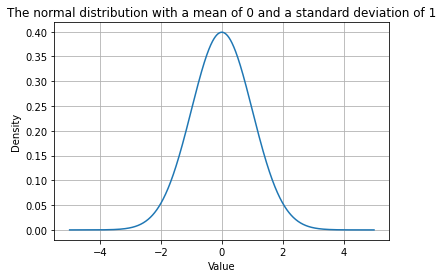

In [7]:
mean = 0
stdev = 1
plot_norm(mean, stdev)

Figure 12-3

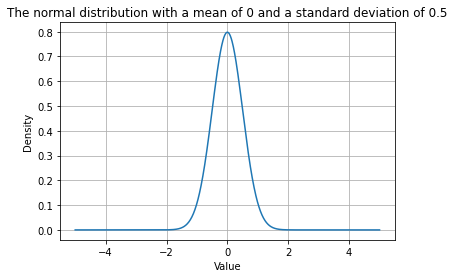

In [8]:
stdev = 0.5
plot_norm(mean, stdev)

Figure 12-4

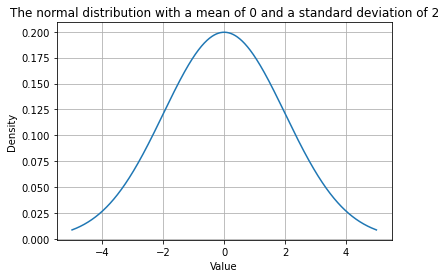

In [9]:
stdev = 2
plot_norm(mean, stdev)

Figure 12-5

### Chapter scenario: Bomb to break open bank safe in heist
- Villain needs 18 seconds to get 200 ft away
- Has 6 fuses of equal length
- Tests 5 fuses to see how much time they'll give him
- Time (seconds) measurements = 19, 22, 20, 19, 23
- mean = 20.6, stdev = 1.62
- Villain wants to be 99.9% sure he'll escape the blast.
- Can we be this sure and proceed with the heist?

In [14]:
mean = 20.6
stdev = 1.62

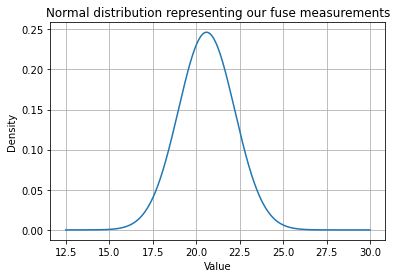

In [15]:
x = np.linspace(12.5, 30, 1000)

# setup normal distribution with our params
normal_dist = norm(mean, stdev)

# normal dist probability density function
pdf_vals = normal_dist.pdf(x)

# plot
plt.plot(x, pdf_vals)
plt.title("Normal distribution representing our fuse measurements")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid()
plt.show()

Figure 12-6

In [6]:
from scipy.integrate import quad
from scipy.stats import norm

pct, err = quad(lambda x: norm.pdf(x, mean, stdev), 10, 18)
print(f'{pct} with absolute error < {err}')

0.05425369496528059 with absolute error < 2.98104495886194e-11


According to this model there's over a 5% chance the fuse will take less than 18 seconds. Not enough time to get away. The shaded area visualizes this probability:

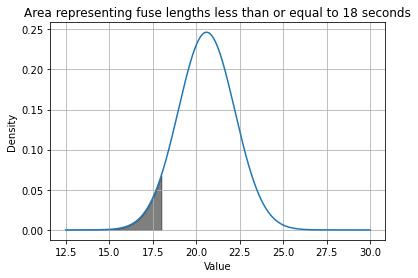

In [16]:
x = np.linspace(12.5, 30, 1000)

# setup normal distribution with our params
normal_dist = norm(mean, stdev)

# normal dist probability density function
pdf_vals = normal_dist.pdf(x)

# plot
plt.plot(x, pdf_vals)

# Shade the area under the curve up to 18 seconds
x_fill = np.linspace(12.5, 18, 1000)
pdf_fill = normal_dist.pdf(x_fill)
plt.fill_between(x_fill, pdf_fill, color='black', alpha=0.5)

plt.title("Area representing fuse lengths less than or equal to 18 seconds")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid()
plt.show()

Figure 12-7

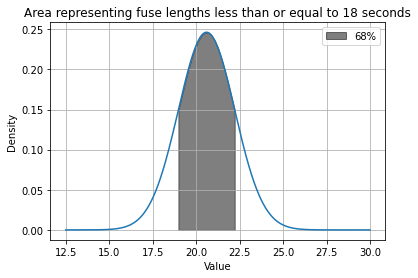

In [28]:
x = np.linspace(12.5, 30, 1000)

# setup normal distribution with our params
normal_dist = norm(mean, stdev)

# normal dist probability density function
pdf_vals = normal_dist.pdf(x)

# plot
plt.plot(x, pdf_vals)

# Shade the area under the curve up to 18 seconds
x_fill = np.linspace(mean-stdev, mean+stdev, 18, 1000)
pdf_fill = normal_dist.pdf(x_fill)
plt.fill_between(x_fill, pdf_fill, color='black', alpha=0.5, label='68%')

plt.title("Area representing fuse lengths less than or equal to 18 seconds")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

Figure 12-8

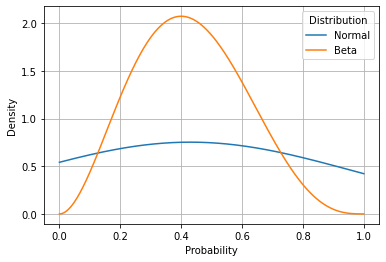

In [38]:
mean, stdev = 0.43, 0.53
alpha, beta_val = 3, 4

x = np.linspace(0, 1, 1000)

# setup normal distribution with our params
normal_dist = norm(mean, stdev)

# normal dist probability density function
pdf_vals_n = normal_dist.pdf(x)
pdf_vals_b = beta.pdf(x, alpha, beta_val)

# plot
plt.plot(x, pdf_vals_n, label='Normal')
plt.plot(x, pdf_vals_b, label='Beta')
plt.xlabel("Probability")
plt.ylabel("Density")
plt.legend(title='Distribution')
plt.grid()
plt.show()

Figure 12-9

### Chapter 12 Exercises

#### 1. What is the probability of observing a value five sigma greater than the mean or more

In [41]:
from scipy.stats import norm
from scipy.integrate import quad

pct, err = quad(lambda x: norm.pdf(x, 0, 1), 10,5)
print(f'{pct} with absolute error: {err}')

-2.866515718791944e-07 with absolute error: 1.355099558621143e-13


#### 2. A fever is any temp > 100.4 degrees F. Given the following measurements, what's the probability the patient has a fever?
100.0, 99.8, 101.0, 100.5, 99.7

##### 3. Suppose 

#### 